In [1]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

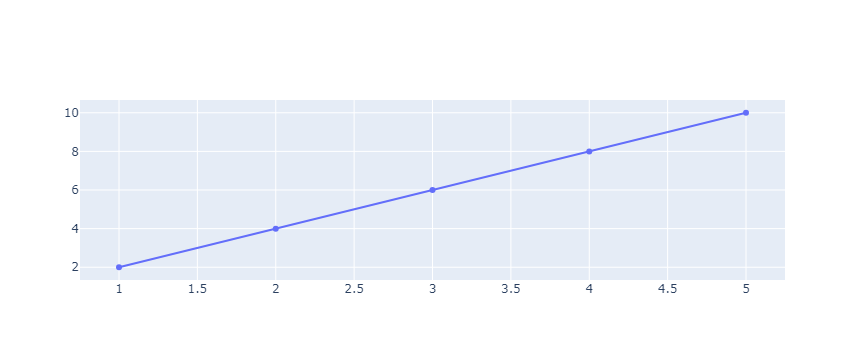

In [5]:
fig=go.Figure()
a=[1,2,3,4,5]
b=[2,4,6,8,10]

fig.add_trace(go.Scatter(x=a,y=b))
fig.show()

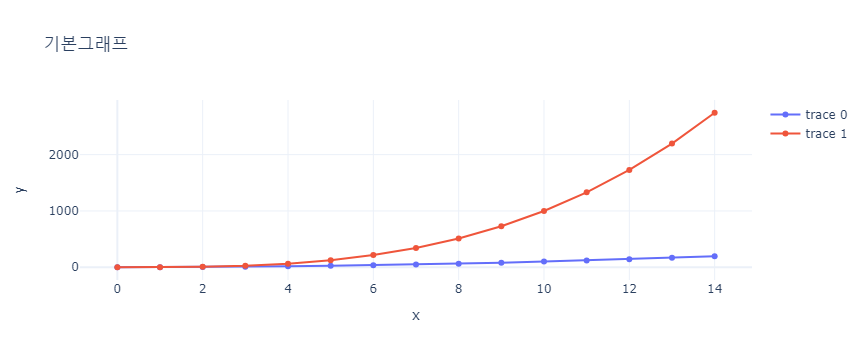

In [10]:
x=np.arange(0,15,1)
y1, y2=x**2, x**3

fig=go.Figure()

for y in [y1,y2]:
    fig.add_trace(go.Scatter(x=x,y=y))

fig.update_layout(title='기본그래프',
                 xaxis_title='x',
                 yaxis_title='y',
                 template='plotly_white')

fig.show()

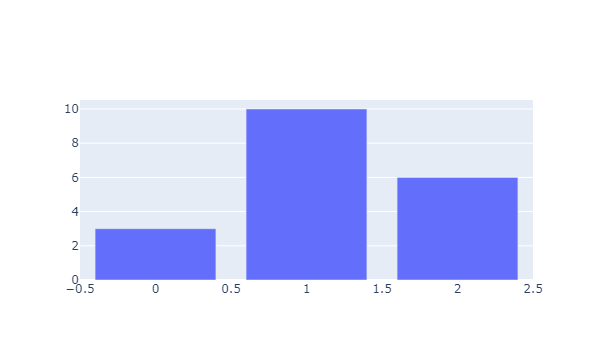

In [7]:
y=[3,10,6]

fig=go.Figure(
    data=[go.Bar(y=y)]
)

fig.show()

In [10]:
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\kaggle-survey-2019\multiple_choice_responses.csv
./kaggle/input\kaggle-survey-2019\other_text_responses.csv
./kaggle/input\kaggle-survey-2019\questions_only.csv
./kaggle/input\kaggle-survey-2019\survey_schema.csv
./kaggle/input\kaggle-survey-2020\kaggle_survey_2020_responses.csv
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_answer_choices.pdf
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_methodology.pdf
./kaggle/input\kaggle-survey-2021\kaggle_survey_2021_responses.csv
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_answer_choices.pdf
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_methodology.pdf


## 데이터 불러오기

In [15]:
#2021년 설문조사 데이터
import pandas as pd
import numpy as np

import pandas as pd
df = pd.read_csv("./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
questions=df.iloc[0,:].T
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [18]:
df=df.loc[1:,:].reset_index(drop=True)
df.head(2)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


## express 방식
- 막대 그래프 그리기

In [21]:
import plotly.express as px

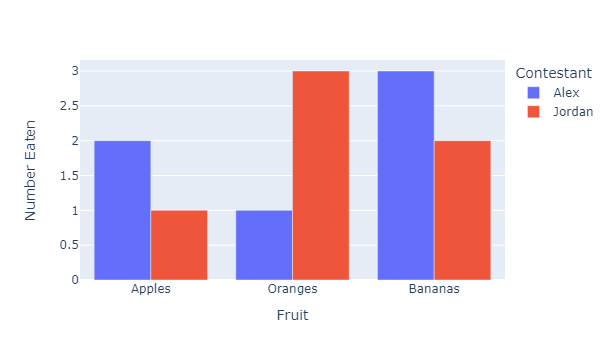

In [23]:
fig = px.bar(temp, x='Fruit', y='Number Eaten',color='Contestant', barmode='group')
fig.show()

In [25]:
long_df=px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


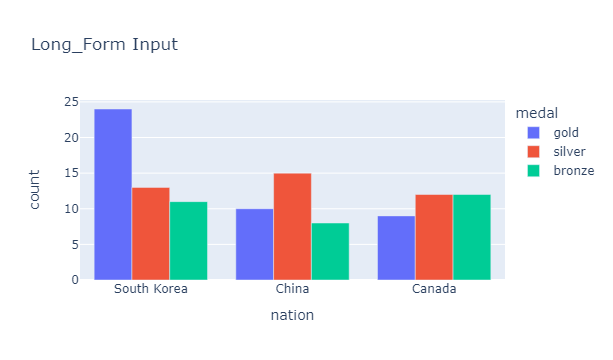

In [32]:
fig = px.bar(long_df, x='nation', y='count',
             color='medal',
             barmode='group',
            title='Long_Form Input')
fig.show()

In [34]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show('json')


In [35]:
df['Q1'].value_counts()

Q1
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: count, dtype: int64

## Q1 BarChart
- 위 결과값을 q1_df로 저장

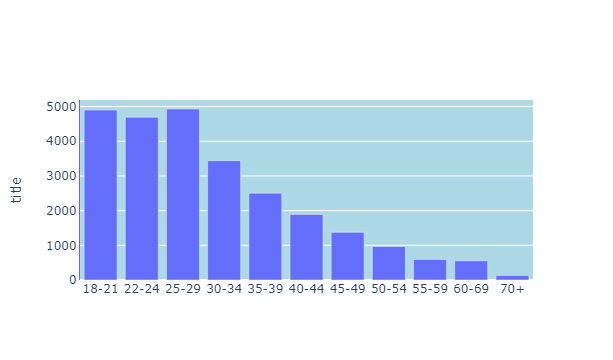

In [50]:
q1_df=df['Q1'].value_counts()

CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]
    #시각화 종류
fig=go.Figure()
fig.add_trace(
    go.Bar(x=q1_df.index,y=q1_df.values)
)
    #시각화 스타일 변경
fig.update_layout(
    xaxis=dict(categoryorder='array',categoryarray=CATEGORY_ORDER),
    yaxis=dict(title='title',linecolor='#9B4EDE'),
    plot_bgcolor='lightblue'
)
fig.show()

In [52]:
df['Q2'].value_counts()

Q2
Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64

In [53]:
q1_q2_df = df.loc[:, ["Q1", "Q2"]].replace({'Prefer not to say':'etc', 'Nonbinary':"etc", "Prefer to self-describe": "etc"})
q1_q2_df['Q2'].value_counts()

Q2
Man      20598
Woman     4890
etc        485
Name: count, dtype: int64

In [54]:
q1_q2_df = q1_q2_df.groupby(['Q2','Q1']).size().reset_index().rename(columns = {0:"Count"})
q1_q2_df.head()

,Q2,Q1,Count
0,Man,18-21,3696
1,Man,22-24,3643
2,Man,25-29,3859
3,Man,30-34,2765
4,Man,35-39,1993


In [55]:
q1_q2_df.tail()

,Q2,Q1,Count
28,etc,45-49,29
29,etc,50-54,17
30,etc,55-59,11
31,etc,60-69,14
32,etc,70+,10


Man
--------------------------------------------------
Woman
--------------------------------------------------
etc
--------------------------------------------------


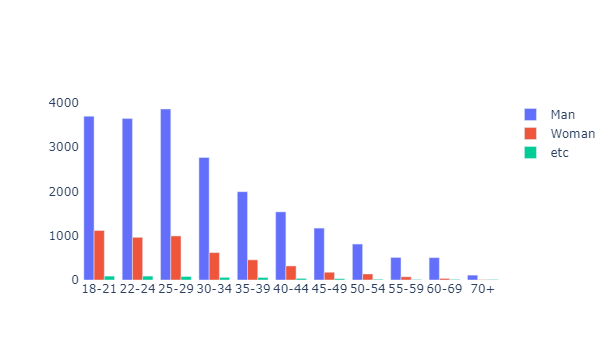

In [61]:
fig=go.Figure()
for gender, group in q1_q2_df.groupby('Q2'):
    print(gender)
    fig.add_trace(go.Bar(x=group['Q1'],y=group['Count'],name=gender))
    print('-'*50)

fig.update_layout(plot_bgcolor='white')

fig.show()

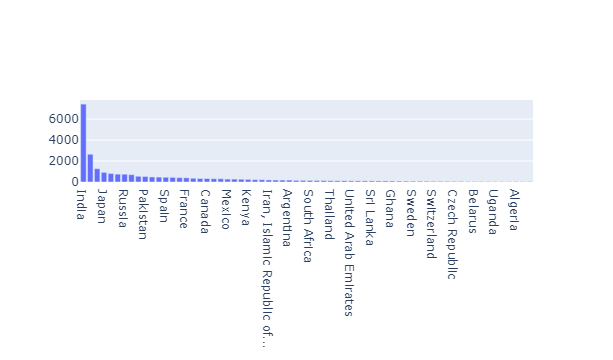

In [63]:
q3_df=df['Q3'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x = q3_df.index, y = q3_df.values))
fig.show()

In [66]:
q3_q25=df.loc[:,'Q3':'Q25']

In [73]:
q3_q25['Q25'].value_counts()
q3_q25['Q25']=q3_q25['Q25'].replace(['$0-999','1,000-1,999'], '$0~1,999')
q3_q25['Q25'].value_counts()[0]

4338

In [74]:
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['2,000-2,999', '3,000-3,999'], '$2,000-3,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['4,000-4,999', '5,000-7,499'], '$4,000-7,499')
q3_q25['Q25'] = q3_q25['Q25'].replace(['25,000-29,999', '60,000-69,999',  
                       '30,000-39,999','15,000-19,999', '70,000-79,999', 
                       '10,000-14,999', '20,000-24,999', '7,500-9,999', 
                       '100,000-124,999', '40,000-49,999', '50,000-59,999', 
                       '300,000-499,999', '200,000-249,999', '125,000-149,999', 
                       '250,000-299,999', '80,000-89,999', '90,000-99,999', 
                       '150,000-199,999', '>$1,000,000', '$500,000-999,999'], '$7,500+')

q3_q25['Q25'].value_counts()

Q25
$7,500+         8943
$0~1,999        4338
$4,000-7,499    1155
$2,000-3,999     955
Name: count, dtype: int64

In [76]:
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15391 entries, 0 to 25972
Columns: 125 entries, Q3 to Q25
dtypes: object(125)
memory usage: 14.8+ MB


In [75]:
q3_q25=q3_q25.dropna(subset=['Q25'])
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15391 entries, 0 to 25972
Columns: 125 entries, Q3 to Q25
dtypes: object(125)
memory usage: 14.8+ MB


In [77]:
q3_q25 = q3_q25.groupby(['Q3','Q25']).size().reset_index().rename(columns = {0:"Count"})
q3_q25

,Q3,Q25,Count
0,Algeria,"$0~1,999",14
1,Algeria,"$2,000-3,999",1
2,Algeria,"$4,000-7,499",3
3,Algeria,"$7,500+",5
4,Argentina,"$0~1,999",34
...,...,...,...
254,United States of America,"$7,500+",1669
255,Viet Nam,"$0~1,999",86
256,Viet Nam,"$2,000-3,999",15
257,Viet Nam,"$4,000-7,499",15


In [84]:
india_df=q3_q25.loc[q3_q25['Q3']=='India',:].reset_index(drop=True)
usa_df=q3_q25.loc[q3_q25['Q3']=='United States of America',:].reset_index(drop=True)

In [85]:
usa_df

,Q3,Q25,Count
0,United States of America,"$0~1,999",140
1,United States of America,"$2,000-3,999",19
2,United States of America,"$4,000-7,499",17
3,United States of America,"$7,500+",1669


In [95]:
india_df['percentage']=india_df['Count']/india_df.Count.sum()
india_df

,Q3,Q25,Count,percentage
0,India,"$0~1,999",1214,0.359597
1,India,"$2,000-3,999",239,0.070794
2,India,"$4,000-7,499",451,0.133590
3,India,"$7,500+",1472,0.436019


In [96]:
usa_df['percentage']=usa_df['Count']/usa_df.Count.sum()
usa_df

,Q3,Q25,Count,percentage
0,United States of America,"$0~1,999",140,0.075881
1,United States of America,"$2,000-3,999",19,0.010298
2,United States of America,"$4,000-7,499",17,0.009214
3,United States of America,"$7,500+",1669,0.904607


In [129]:
india_df['%'] = np.round(india_df['percentage'] * 100, 1)
usa_df['%'] = np.round(usa_df['percentage'] * 100, 1)

In [130]:
df=india_df.merge(usa_df,how='outer')
df

,Q3,Q25,Count,percentage,%
0,India,"$0~1,999",1214,0.359597,36.0
1,India,"$2,000-3,999",239,0.070794,7.1
2,India,"$4,000-7,499",451,0.133590,13.4
3,India,"$7,500+",1472,0.436019,43.6
4,United States of America,"$0~1,999",140,0.075881,7.6
5,United States of America,"$2,000-3,999",19,0.010298,1.0
6,United States of America,"$4,000-7,499",17,0.009214,0.9
7,United States of America,"$7,500+",1669,0.904607,90.5


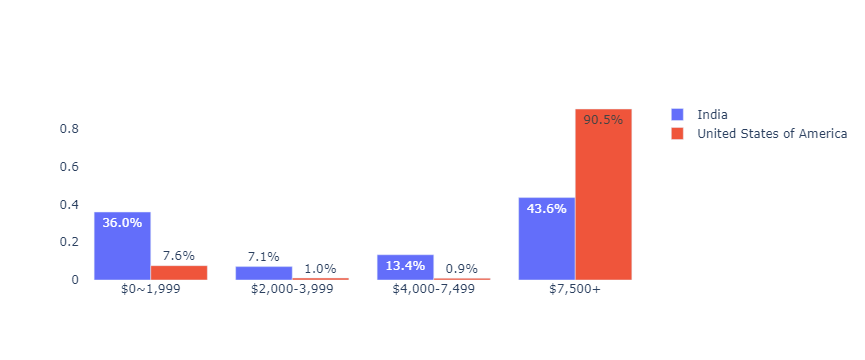

In [132]:
fig=go.Figure()
for nation, group in df.groupby('Q3'):
    fig.add_trace(go.Bar(x=group['Q25'],
                         y=group['percentage'],
                         name=nation,
                        text=group['%'].astype(str)+'%',
                        textposition='auto'))

fig.update_layout(plot_bgcolor='white')

fig.show()